<a href="https://colab.research.google.com/github/spolice0324/naverWebtoon_Recommendation/blob/main/naverWebtoon_Recommendation_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leeseungyeon939","key":"be524472270be267b4190bc559967246"}'}

In [ ]:
ls -1ha kaggle.json


kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bmofinnjake/naverwebtoon-datakorean

  0% 0.00/808k [00:00<?, ?B/s]
100% 808k/808k [00:00<00:00, 11.5MB/s]


In [ ]:
!unzip /content/sample_data/nw.csv

Archive:  /content/sample_data/nw.csv
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/sample_data/nw.csv or
        /content/sample_data/nw.csv.zip, and cannot find /content/sample_data/nw.csv.ZIP, period.


In [ ]:
from datetime import timedelta, datetime
import json
import os
import re

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.font_manager as fm

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [ ]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [ ]:
df = pd.read_csv('/content/sample_data/nw.csv')
df.head()

,id,title,author,genre,description
0,10000,참교육,"채용택, 한가람",액션,무너진 교권을 지키기 위해 교권보호국 소속 나화진의 참교육이 시작된다!<부활남> 채...
1,10001,뷰티풀 군바리,"설이, 윤성원",드라마,'여자도 군대에 간다면?'본격 여자도 군대 가는 만화!
2,10002,퀘스트지상주의,박태준 만화회사,드라마,"[외모지상주의], [싸움독학], [인생존망]과 세계관을 공유하는 작품!공부, 싸움,..."
3,10003,장씨세가 호위무사,"김인호, 조형근",무협/사극,‘당신이 부른 것이오. 나란 사람을... ’은둔고수 광휘. 호위무사 되다.웹소설 원...
4,10004,윈드브레이커,조용석,스포츠,혼자서 자전거를 즐겨타던 모범생 조자현.원치 않게 자전거 크루의 일에 자꾸 휘말리게...


In [ ]:
df.columns

Index(['id', 'title', 'author', 'genre', 'description'], dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=570, step=1)

In [ ]:
!apt-get install fonts-nanum*
all_fonts_I_can_use = fm.findSystemFonts(fontpaths=None, fontext='ttf')
all_fonts_I_can_use

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


['/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongj

In [ ]:
fontpath = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf" 
fm.fontManager.addfont(fontpath)

# 새 섹션

In [ ]:
font_name = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family=font_name.get_name())

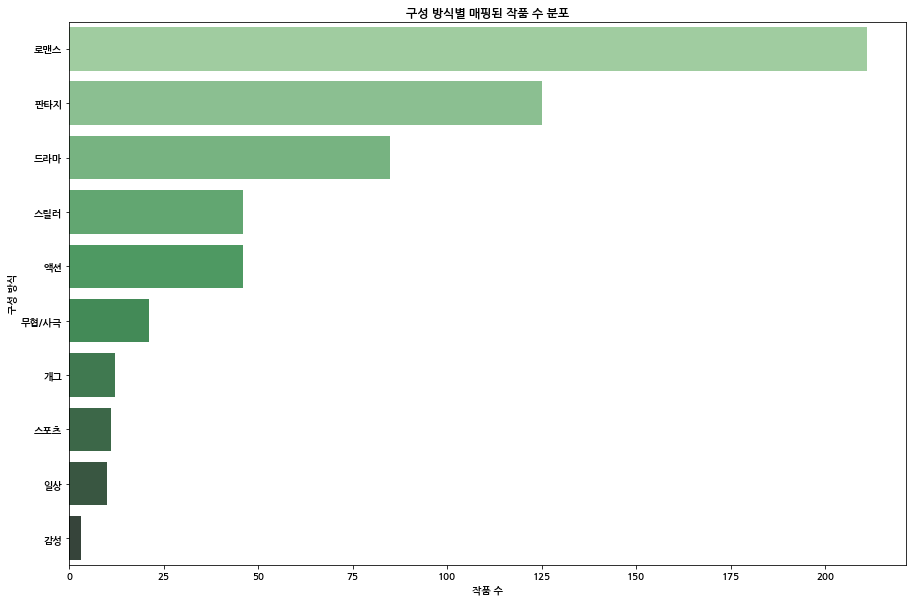

In [ ]:
#전개방식 별 작품수 
gnr_count = df.groupby('genre').id.nunique().reset_index(name='gnr_cnt')
gnr_list_desc = gnr_count.sort_values('gnr_cnt', ascending=False).genre

# plotting
plt.figure(figsize=(15, 10))
gnr_cnt_plot = sns.barplot(x='gnr_cnt', y='genre', data=gnr_count, order=gnr_list_desc, palette="Greens_d")
gnr_cnt_plot.set_title('구성 방식별 매핑된 작품 수 분포')
gnr_cnt_plot.set_ylabel('구성 방식')
gnr_cnt_plot.set_xlabel('작품 수')

plt.show()

In [ ]:
from datetime import timedelta, datetime
import json
import os
import re

import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')


In [ ]:
!pip3 install JPype1
!pip3 install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
all_gnr = set(df['genre'])
all_gnr

{'감성', '개그', '드라마', '로맨스', '무협/사극', '스릴러', '스포츠', '액션', '일상', '판타지'}

In [ ]:
from konlpy.tag import Kkma, Hannanum, Komoran
from konlpy.utils import pprint

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()

In [ ]:
#웹툰 시놉시스 텍스트에 대한 stopword 설정
stop_words = set("를 의 웹 툰 웹툰 웹툰판 이번 들 등 수  이 부 판 뿐 그 것 나 그 그녀 속 시작 속 작가 신작".split())
stop_words |= set("이야기 데 전 후 두 앞 뒤 그들 때문 사람 두 신작 한 자신 만화 소년 소녀 ".split())

In [ ]:
def get_voca(doclist):
    doc_nouns_list = []

    for doc in doclist:
        nouns = hannanum.nouns(doc)
        doc_nouns = ''

        for noun in nouns:
            if noun not in stop_words:
                doc_nouns += noun + ' '

        doc_nouns_list.append(doc_nouns)
    return doc_nouns_list

In [ ]:
def recomend_by_word(doclist, result):
    # 결과 웹툰 식별을 위한 딕셔너리
    id_dict = {i: id for i, id in enumerate(doclist['id'])}

    description = doclist['description']
    voca = get_voca(description)

    # TF-IDF
    tfidf_vectorizer = TfidfVectorizer(min_df=1)
    tfidf_matrix = tfidf_vectorizer.fit_transform(voca)
    document_distances = tfidf_matrix * tfidf_matrix.T

    print('유사도 분석을 위한 ' + str(document_distances.get_shape()[0]) + 
          'x' + str(document_distances.get_shape()[1]) + 'matrix를 만들었습니다.', end='->')
    n = document_distances.get_shape()[0]
    cnt = 0
    for i in range(n):
        a = document_distances[i].toarray().T
        similarity = set()
        for j in range(n):
            if a[j][0] > 0.15 and j != i: 
                similarity.add(id_dict[j]) # 웹툰번호로 저장
        if len(similarity) > 0:
            result[id_dict[i]] = result.get(id_dict[i], set([])) | set(similarity)
            cnt += 1
    print(f'{cnt}개 웹툰에 대한 추천')
    return result

In [ ]:
result = recomend_by_word(df[['id', 'description']], {})

유사도 분석을 위한 570x570matrix를 만들었습니다.->263개 웹툰에 대한 추천


In [ ]:
print(result)

{10001: {10482, 10323, 10204}, 10002: {10468, 10085}, 10008: {10537, 10476, 10534}, 10010: {10146, 10428, 10036, 10218}, 10011: {10083, 10054, 10239}, 10013: {10089, 10322, 10277}, 10014: {10368}, 10015: {10177}, 10017: {10529}, 10018: {10234}, 10019: {10283}, 10026: {10043, 10437}, 10027: {10168, 10415}, 10029: {10272, 10368, 10529, 10155, 10444, 10381, 10162, 10197, 10357, 10299, 10335, 10271}, 10032: {10298}, 10033: {10119}, 10036: {10146, 10562, 10010, 10428, 10106}, 10037: {10242}, 10039: {10281}, 10041: {10450}, 10042: {10368}, 10043: {10437, 10458, 10026, 10428, 10445, 10366}, 10044: {10152, 10353, 10133, 10055}, 10046: {10458}, 10048: {10177, 10305, 10291, 10202, 10281, 10298}, 10049: {10456}, 10050: {10181}, 10053: {10434}, 10054: {10011, 10518, 10239}, 10055: {10152, 10353, 10044, 10133}, 10059: {10509}, 10069: {10195, 10486}, 10073: {10313, 10409, 10308}, 10075: {10224, 10277}, 10077: {10080, 10498, 10267, 10486}, 10078: {10159}, 10080: {10498, 10379, 10077, 10486}, 10083: {

In [ ]:
for gnr_name in all_gnr:
    print(f'in {gnr_name}...', end=' ')
    doclist = df[df['genre']==gnr_name][['id', 'description']]
    recomend_by_word(doclist, result)

in 판타지... 유사도 분석을 위한 125x125matrix를 만들었습니다.->32개 웹툰에 대한 추천
in 로맨스... 유사도 분석을 위한 211x211matrix를 만들었습니다.->68개 웹툰에 대한 추천
in 스포츠... 유사도 분석을 위한 11x11matrix를 만들었습니다.->0개 웹툰에 대한 추천
in 무협/사극... 유사도 분석을 위한 21x21matrix를 만들었습니다.->0개 웹툰에 대한 추천
in 스릴러... 유사도 분석을 위한 46x46matrix를 만들었습니다.->4개 웹툰에 대한 추천
in 일상... 유사도 분석을 위한 10x10matrix를 만들었습니다.->0개 웹툰에 대한 추천
in 감성... 유사도 분석을 위한 3x3matrix를 만들었습니다.->0개 웹툰에 대한 추천
in 개그... 유사도 분석을 위한 12x12matrix를 만들었습니다.->0개 웹툰에 대한 추천
in 액션... 유사도 분석을 위한 46x46matrix를 만들었습니다.->5개 웹툰에 대한 추천
in 드라마... 유사도 분석을 위한 85x85matrix를 만들었습니다.->22개 웹툰에 대한 추천


In [ ]:
# 웹툰 번호 제목으로 표기해서 출력
def show_result(result):
    i = 1
    for key, value in result.items():
        print(i, df[df['id']==key].title.item(), end='\n➡️ ')
        print(' / '.join([df[df['id']==v].title.item() for v in value]))
        print('---'*15)
        i += 1

In [ ]:
show_result(result)

1 뷰티풀 군바리
➡️ 좋아해 아니 싫어해 / 카루나 / 헤어지면 죽음
---------------------------------------------
2 퀘스트지상주의
➡️ 소년 검사 / 김부장
---------------------------------------------
3 버림받은 왕녀의 은밀한 침실
➡️ 몸이 바뀌는 사정 / 마왕의 고백 / 다비, 아찔하게 흐르는
---------------------------------------------
4 호랑신랑뎐
➡️ 이 결혼, 새로고침 / 또다시, 계약 부부 / 범이올시다! / 반드시 해피엔딩 / 호랑이 들어와요
---------------------------------------------
5 똑 닮은 딸
➡️ 신군 / 메리의 불타는 행복회로 / 해귀
---------------------------------------------
6 잔불의 기사
➡️ 내가 키운 S급들 / 돌아온 여기사 / 완벽한 결혼의 정석
---------------------------------------------
7 강남의 기사
➡️ 지옥 키우기
---------------------------------------------
8 이별 후 사내 결혼
➡️ 나쁜사람
---------------------------------------------
9 리턴 투 플레이어
➡️ 노량진 공격대
---------------------------------------------
10 히어로메이커
➡️ 멸종위기종인간
---------------------------------------------
11 북부 공작님을 유혹하겠습니다
➡️ 사기 친 공작님을 유혹해버렸다
---------------------------------------------
12 결혼생활 그림일기
➡️ 불청객 / 남편 먹는 여자
---------------------------------------------
13 사이다걸
➡️ 먹는 인생 / 호랑이형님
---

In [ ]:
def find_recommend(result, title):
    print(f'웹툰 [{title}]과 비슷한 다른 웹툰은...', end=' ')
    others = result.get(df[df['title']==title].id.item(), [])
    if not others:
        print('아직 없습니다.')
        return
    print(' / '.join([df[df['id']==s].title.item() for s in others]))

In [ ]:
find_recommend(result, '개를 낳았다')

웹툰 [개를 낳았다]과 비슷한 다른 웹툰은... 대신 심부름을 해다오 / 마루는 강쥐
